In [ ]:
!pip install -q numpy pandas matplotlib cbor2 cartopy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cbor2

In [2]:
# Read CBOR file
with open("data/2025-07-11_05-39_noaa_apt_137MHz/product.cbor", "rb") as f:
    product = cbor2.load(f)

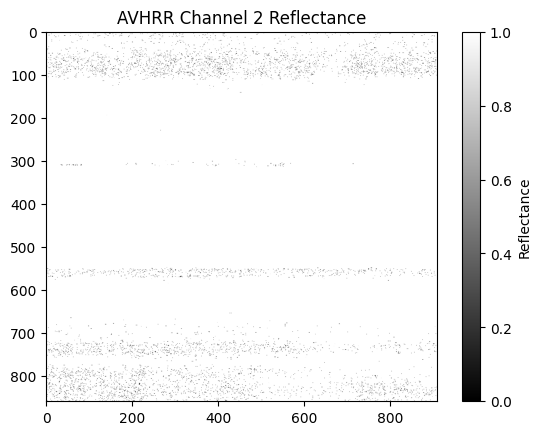

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open("data/2025-07-11_05-39_noaa_apt_137MHz/AVHRR-2.png").convert("L")  # channel 2
arr = np.array(img)

# Scale using calibration range (0-1.0 for this channel)
arr_scaled = arr / 255.0  # since bit_depth = 8

plt.imshow(arr_scaled, cmap="gray")
plt.colorbar(label="Reflectance")
plt.title("AVHRR Channel 2 Reflectance")
plt.show()

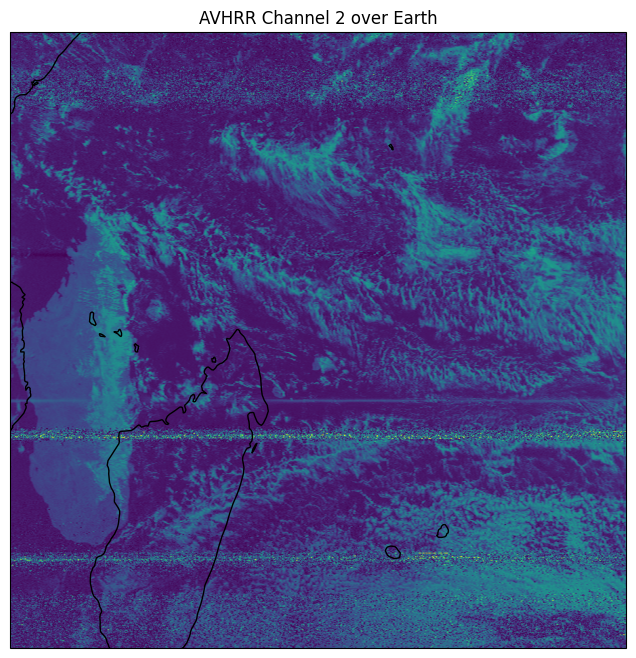

In [18]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = np.array(Image.open("data/2025-07-11_05-39_noaa_apt_137MHz/AVHRR-2.png"))

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Fake georeferencing (you’d replace with actual from projection_cfg)
extent = [40, 65, -25, 0]  # lon_min, lon_max, lat_min, lat_max
ax.imshow(img, extent=extent, transform=ccrs.PlateCarree(), origin='upper')

plt.title("AVHRR Channel 2 over Earth")
plt.show()